<a href="https://colab.research.google.com/github/har200509/Document_classifier/blob/main/Document_classifier_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
#Import the pandas library for data manipulation and analysis.
import pandas as pd
# Import the string module to work with strings and punctuation.
import string

In [166]:
# Import the nltk library for natural language processing tasks.
import nltk
# Download the 'punkt' tokenizer data, which is essential for word tokenization.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [167]:
# Import the word_tokenize function from nltk.tokenize for tokenizing text into words.
from nltk.tokenize import word_tokenize

In [168]:
# Download the 'wordnet' corpus, a lexical database for English, used for lemmatization.
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [169]:
# Import the stopwords corpus from nltk.corpus to access a list of common English stopwords.
from nltk.corpus import stopwords
# Download the 'stopwords' corpus.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
# Import the WordNetLemmatizer from nltk.stem for reducing words to their base or dictionary form.
from nltk.stem import WordNetLemmatizer
# Create an instance of the WordNetLemmatizer.
lemma=WordNetLemmatizer()

In [171]:
# Import the string module (already imported in a previous cell, but good for clarity).
import string
# Import the re module for regular expressions, used here for pattern matching.
import re

In [172]:
# Load the dataset from the 'results.csv' file into a pandas DataFrame.
df=pd.read_csv('/content/results.csv')

In [173]:
# Display a random sample of 5 rows from the DataFrame to get a quick look at the data.
df.sample(5)

,document,text
438,BILL of Entry,original customs copy indian customs edi sys...
805,DELIVERY CHALLAN,fp pepperl fuchs factory automation pvt ltd ...
123,E WAY BILL,e way bill e way bill e way bill date pm gen...
787,DELIVERY CHALLAN,delivery challan zener systems pvt ltd deliver...
630,DELIVERY CHALLAN,delivery challan non returnable challan pu ...


In [174]:
# Convert the 'document' column to lowercase to ensure consistency in categorical data.
df['document'] = df['document'].str.lower()

In [175]:
# Count the occurrences of each unique value in the 'document' column.
df['document'].value_counts()

,count
document,
delivery challan,230
e way bill,222
invoice,203
bill of entry,76
purchase order,70
debit note,60
credit note,57


In [176]:
# Extract the 'text' column from the DataFrame and convert it to a list.
corpus_df=df['text'].tolist()

In [177]:
# Get the number of documents in the corpus_df list.
len(corpus_df)

918

In [178]:
# Iterate through each document in the corpus_df list.
for i in range(len(corpus_df)):
  # Iterate through each punctuation mark in the string.punctuation set.
  for punc in string.punctuation:
    # Check if the current punctuation mark is present in the document.
    if punc in corpus_df[i]:
      # Replace the punctuation mark with an empty string (effectively removing it).
      # NOTE: The replace method on strings returns a new string, it does not modify in-place.
      # The result of the replace is not being assigned back to corpus_df[i], so this loop doesn't actually remove punctuation.
      corpus_df[i].replace(punc,"")

In [179]:
# Define a regular expression pattern to match words with 2 or 3 lowercase letters.
pattern=r'^[a-z]{2,3}$'

In [164]:
# Initialize an empty set to store the unique words (vocabulary).
vocab=set()
# Iterate through each document in the corpus_df list.
for i in range(len(corpus_df)):
    # Tokenize the document into words.
    words = word_tokenize(corpus_df[i])
    # Lemmatize each word to its base form and convert to lowercase,
    # and remove stopwords from the list of words.
    words = [lemma.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    # Filter out words that match the defined pattern (2 or 3 lowercase letters).
    words = [word for word in words if not re.match(pattern, word)]
    # Add the processed words to the vocabulary set.
    vocab.update(words)
    # Join the processed words back into a string and update the document in corpus_df.
    corpus_df[i] = " ".join(words)

In [180]:
# Get the size of the vocabulary set.
len(vocab)

9122

In [ ]:
# Import the TfidfVectorizer from sklearn.feature_extraction.text for creating TF-IDF representations of text.
from sklearn.feature_extraction.text import TfidfVectorizer

In [182]:
# Create a TfidfVectorizer instance, specifying 'english' stopwords and using the pre-built vocabulary.
vectorizer=TfidfVectorizer(stop_words='english',vocabulary=vocab)

In [183]:
# Fit the vectorizer to the preprocessed text data (corpus_df) and transform it into a TF-IDF matrix.
tfidfmatrix=vectorizer.fit_transform(corpus_df)

In [184]:
# Get the shape of the TF-IDF matrix (number of documents, number of unique words in the vocabulary).
tfidfmatrix.shape

(918, 9122)

In [185]:
# Import LabelEncoder from sklearn.preprocessing for encoding categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
# Create an instance of the LabelEncoder.
le=LabelEncoder()

In [186]:
# Encode the 'document' column of the DataFrame using the LabelEncoder.
df['document']=le.fit_transform(df['document'])

In [187]:
# Count the occurrences of each unique numerical label in the 'document' column after encoding.
df['document'].value_counts()

,count
document,
3,230
4,222
5,203
0,76
6,70
2,60
1,57


In [188]:
# Create a dictionary to map the numerical labels back to their original document type names.
doc_label={0:'bill of entry',1:'credit note',2:'debit note',3:'delivery challan',4:'e way bill',5:'invoice',6:'purchase order   '}

In [189]:
# Import the train_test_split function from sklearn.model_selection for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
# Split the TF-IDF matrix (features) and the encoded 'document' column (labels) into training and testing sets.
# The test set size is 30% of the data, random_state ensures reproducibility, and stratify maintains the proportion of each class in both sets.
x_train,x_test,y_train,y_test=train_test_split(tfidfmatrix,df['document'],test_size=0.3,random_state=42,stratify=df['document'])

In [190]:
# Import the Support Vector Classifier (SVC) from sklearn.svm.
from sklearn.svm import SVC
# Create an instance of the SVC model with a linear kernel.
model = SVC(kernel='linear')
# Train the SVC model using the training data.
model.fit(x_train, y_train)

SVC(kernel='linear')

In [191]:
# Import necessary metrics for evaluating the model: accuracy_score, confusion_matrix, and classification_report.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [192]:
# Print the classification report for the training data, showing precision, recall, f1-score, and support for each class.
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.95      0.97        40
           2       0.95      1.00      0.98        42
           3       1.00      1.00      1.00       161
           4       1.00      1.00      1.00       155
           5       1.00      1.00      1.00       142
           6       1.00      1.00      1.00        49

    accuracy                           1.00       642
   macro avg       0.99      0.99      0.99       642
weighted avg       1.00      1.00      1.00       642



In [193]:
# Calculate and print the accuracy score of the SVC model on the training data.
accuracy_score(y_train,model.predict(x_train))

0.9968847352024922

In [194]:
# Calculate and print the accuracy score of the SVC model on the testing data.
accuracy_score(y_test,model.predict(x_test))

0.9637681159420289

In [195]:
# Import the seaborn library for statistical data visualization.
import seaborn as sns

In [196]:
# Import the RandomForestClassifier from sklearn.ensemble.
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the RandomForestClassifier with specified hyperparameters.
rf=RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=180)

In [197]:
# Train the RandomForestClassifier model using the training data.
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=180)

In [198]:
# Print the classification report for the training data using the RandomForestClassifier.
print(classification_report(y_train,rf.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.95      0.97        40
           2       0.95      1.00      0.98        42
           3       0.98      1.00      0.99       161
           4       1.00      0.99      0.99       155
           5       1.00      1.00      1.00       142
           6       1.00      0.98      0.99        49

    accuracy                           0.99       642
   macro avg       0.99      0.99      0.99       642
weighted avg       0.99      0.99      0.99       642



In [199]:
# Calculate and print the accuracy score of the RandomForestClassifier model on the training data.
accuracy_score(y_train,rf.predict(x_train))

0.9922118380062306

In [200]:
# Calculate and print the accuracy score of the RandomForestClassifier model on the testing data.
accuracy_score(y_test,rf.predict(x_test))

0.9710144927536232

In [201]:
# Install the xgboost library.
!pip install xgboost

In [202]:
# Import the xgboost library and the XGBClassifier.
import xgboost as xgb
from xgboost import XGBClassifier
# Import necessary metrics from sklearn.metrics (already imported, but good for clarity).
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [204]:
# Define the best hyperparameters found for the XGBoost model.
best_params = {
    'colsample_bytree': 0.7131,
    'gamma': 0.4469,
    'learning_rate': 0.302,
    'max_depth': 5,
    'n_estimators': 257,
    'reg_alpha': 0.814,
    'reg_lambda': 2.744,
    'subsample': 0.774
}

# Create an instance of the XGBClassifier with the best hyperparameters.
# 'objective' is set to 'multi:softprob' for multi-class classification with predicted probabilities.
# 'tree_method' is set to 'hist' for potentially faster training on large datasets.
xgmodel = XGBClassifier(**best_params, objective='multi:softprob', tree_method='hist')
# Train the XGBoost model using the training data.
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7131, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4469, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.302, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=257, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [205]:
# Print the classification report for the training data using the XGBoost model.
print(classification_report(y_train,xgmodel.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00       161
           4       1.00      1.00      1.00       155
           5       1.00      1.00      1.00       142
           6       1.00      1.00      1.00        49

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [206]:
# Calculate and print the accuracy score of the XGBoost model on the training data.
accuracy_score(y_train,xgmodel.predict(x_train))

1.0

In [207]:
# Calculate and print the accuracy score of the XGBoost model on the testing data.
accuracy_score(y_test,xgmodel.predict(x_test))

0.9746376811594203

<Axes: >

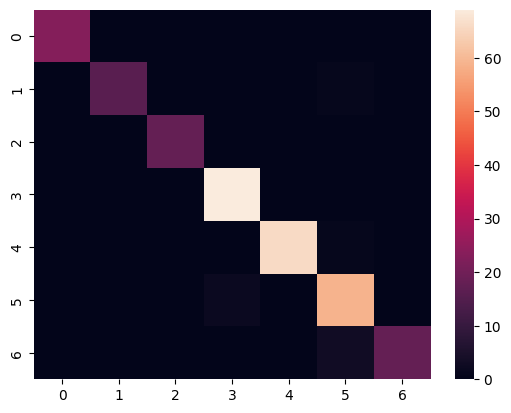

In [208]:

# Generate and display a heatmap of the confusion matrix for the XGBoost model on the testing data.
# This helps visualize the performance of the classifier by showing the counts of true positive, true negative, false positive, and false negative predictions.
sns.heatmap(confusion_matrix(y_test,xgmodel.predict(x_test)))

In [209]:
# Load a new dataset for validation from 'Demo_2.csv' into a pandas DataFrame.
validation=pd.read_csv('/content/Demo_2.csv')

In [210]:
# Display the first few rows of the validation DataFrame to inspect its structure and data.
validation.head()

,label,text
0,credit note,manickbag automobiles p ltd tata motors vid...
1,e way bill,e way bill e way bill details eway bill gene...
2,credit note,credit note e invoice irn baee f acb b de b e...
3,credit note,credit note airtel original recipient mailing ...
4,credit note,credit note e invoice irn ee cea ebadd c c b ...


In [211]:
# Rename the 'label' column to 'document' in the validation DataFrame to match the training data's column name.
validation.rename(columns={'label':'document'},inplace=True)

In [212]:
# Display the first few rows of the validation DataFrame after renaming the column.
validation.head()

,document,text
0,credit note,manickbag automobiles p ltd tata motors vid...
1,e way bill,e way bill e way bill details eway bill gene...
2,credit note,credit note e invoice irn baee f acb b de b e...
3,credit note,credit note airtel original recipient mailing ...
4,credit note,credit note e invoice irn ee cea ebadd c c b ...


In [213]:
# Count the occurrences of each unique value in the 'document' column of the validation DataFrame.
validation['document'].value_counts()

,count
document,
credit note,71
e way bill,64
delivery challan,28
purchase order,8
debit note,5


In [214]:
# Extract the 'text' column from the validation DataFrame and convert it to a list.
corpus_demo2=validation['text'].tolist()

In [215]:
# Get the number of documents in the corpus_demo2 list.
len(corpus_demo2)

176

In [216]:
# Iterate through each document in the corpus_demo2 list.
for i in  range(len(corpus_demo2)):
  # Iterate through each punctuation mark in the string.punctuation set.
  for punc in string.punctuation:
    # Check if the current punctuation mark is present in the document.
    if punc in corpus_demo2[i]:
      # Replace the punctuation mark with an empty string (effectively removing it).
      # NOTE: Similar to the previous punctuation removal loop, the result of replace is not assigned back.
      corpus_demo2[i].replace(punc,"")

In [217]:
# Iterate through each document in the corpus_demo2 list.
for i in range(len(corpus_demo2)):
    # Tokenize the document into words.
    words = word_tokenize(corpus_demo2[i])
    # Lemmatize each word to its base form and convert to lowercase,
    # and remove stopwords from the list of words.
    words = [lemma.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    # Filter out words that match the defined pattern (2 or 3 lowercase letters).
    words = [word for word in words if not re.match(pattern, word)]
    # Join the processed words back into a string and update the document in corpus_demo2.
    corpus_demo2[i] = " ".join(words)

In [218]:
# Create a TfidfVectorizer instance with the same settings as used for the training data
# (using the same vocabulary and English stopwords).
vectorizer=TfidfVectorizer(stop_words='english',vocabulary=vocab)

In [219]:
# Fit the vectorizer to the preprocessed validation text data (corpus_demo2) and transform it into a TF-IDF matrix.
tfidfmatrix=vectorizer.fit_transform(corpus_demo2)

In [220]:
# Get the shape of the TF-IDF matrix for the validation data.
tfidfmatrix.shape

(176, 9122)

In [221]:
# Use the trained XGBoost model to predict the document type for the validation TF-IDF matrix.
predicted = xgmodel.predict(tfidfmatrix)

In [222]:
# Re-define the dictionary to map numerical labels back to document type names (already defined, but good for clarity).
doc_label={0:'bill of entry',1:'credit note',2:'debit note',3:'delivery challan',4:'e way bill',5:'invoice',6:'purchase order   '}

In [223]:
# Display the predicted labels for the validation data.
predicted

array([5, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 3, 3, 3, 1, 1, 1, 5, 5, 3, 3, 3, 3, 3, 5, 5, 3,
       3, 3, 3, 3, 3, 5, 5, 3, 3, 5, 3, 3, 3, 0, 3, 3, 5, 3, 3, 3, 5, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6])

In [224]:
# Get the number of predicted labels.
len(predicted)

176

In [225]:
# Initialize a counter for correct predictions.
count=0;
# Iterate through the predicted labels and compare them with the actual labels in the validation DataFrame.
for i in range(len(predicted)):
  # Get the document type name corresponding to the predicted numerical label.
  value=doc_label.get(predicted[i])
  # Check if the predicted document type matches the actual document type in the validation DataFrame.
  if value==validation.iloc[i,0]:
    # If they match, increment the counter.
    count=count+1
# Calculate and print the accuracy percentage of the predictions on the validation data.
print((count/len(predicted)*100))

77.27272727272727
